In [1]:
from environments.PlantSimulator import MultiPlantSimulator
import numpy as np
import matplotlib.pyplot as plt

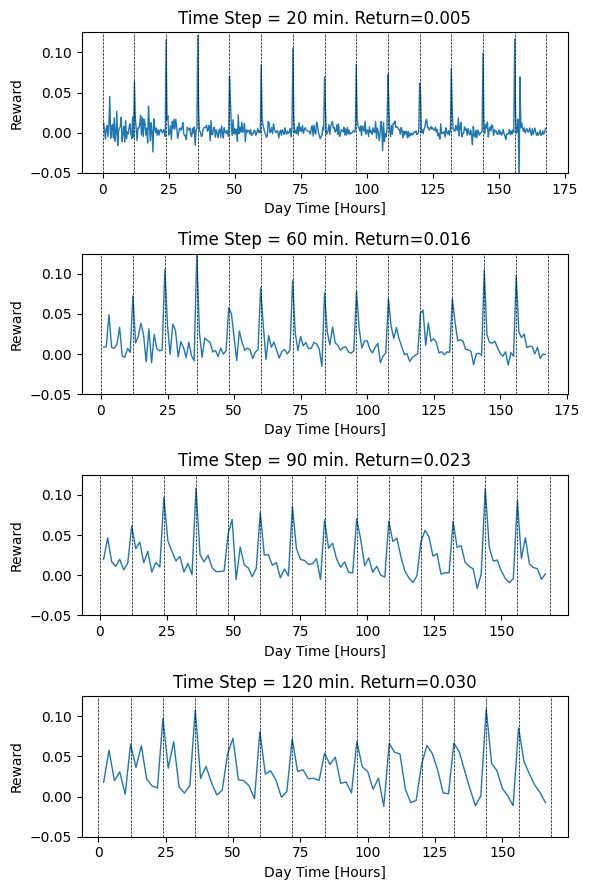

In [11]:
base_step = 10/60     # spreadsheet time step is 10 minutes
STRIDE = [2, 6, 9, 12]
fig, ax = plt.subplots(4, 1, figsize=(6,9))

for i in range(len(STRIDE)):
    stride = STRIDE[i]
    env = MultiPlantSimulator(num_plants=32, lag=1, stride=stride, actions=[0, 1], action_effects=[1.0, 0.0])
    env.start()
    R = []  
    for _ in range(env.terminal_step):
        reward, next_state, done, info = env.step(1)   # light always on
        R.append(reward)
    
    ax[i].plot(np.arange(1, len(R)+1)*base_step*stride, R, linewidth=1)
    ax[i].set_title(f'Time Step = {10*stride} min. Return={np.mean(R):.3f}')
    ax[i].set_xlabel('Day Time [Hours]')
    ax[i].set_ylabel('Reward')
    ax[i].set_ylim(-0.05, 0.125)

for i in range(int(len(R)/env.steps_per_day)+2):
    ax[0].axvline(x = 12*i, color='k', linestyle='--', linewidth=0.5)
    ax[1].axvline(x = 12*i, color='k', linestyle='--', linewidth=0.5)
    ax[2].axvline(x = 12*i, color='k', linestyle='--', linewidth=0.5)
    ax[3].axvline(x = 12*i, color='k', linestyle='--', linewidth=0.5)

fig.tight_layout()